##**Анализ данных автомобилей (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели стоимости)**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
import random as rnd
import re
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [ ]:
df = pd.read_csv('car_price_prediction.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Удалим дубликаты

In [ ]:

df = df.drop_duplicates().assign()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

ID             -   	ID

Price           -  	Цена

Levy            -  	Налог

Manufacturer    -  	Производитель

Model          -   	Модель

Prod. year	   -     Год выпуска

Category	      -    Категория

Leather interior	-  Идентификатор кожаный салон или нет

Fuel type	      -    Тип двигателя

Engine volume	   -   Объем двигателя

Mileage	        -    Пробег

Cylinders	       -   Количество цилиндров

Gear box type	  -    Тип коробки передач

Drive wheels	  -    Привод

Doors	         -     Количество дверей

Wheel	       -       Правый руль или нет

Color	       -       Цвет

Airbags       -    	Количество подушек безопасности


In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Приведем столбцы к необходимому формату, для этого очистим столбцы от ненужных символов

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [ ]:
df.Levy.unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [ ]:
df_test = df[:]

In [ ]:
# В стобце "Levy" заменим "-" на NaN
def levy_func(x):
    if '-' in x:
        return np.NaN
    return int(x)
df_test['Levy'] = df_test['Levy'].apply(levy_func)
#Добавим новый столбец с идетификатором турбированного мотора
def turbo_func(x):
  if 'Turbo' in x:
    return 1
  return 0
df_test['Turbo'] = df_test['Engine volume'].apply(turbo_func)
#Из столбца "engine volume" уберем идентификатор "Turbo" и приведем к типу float
def engine_volume_func(x):
  if 'Turbo' in x:
    return x.replace('Turbo','').strip()
  return float(x)
df_test['Engine volume'] = df_test['Engine volume'].apply(engine_volume_func)
df_test['Engine volume']
df_test['Engine volume'].astype('float')

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64

In [ ]:
df_test['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [ ]:
#Уберем из столбца "mileage" окончание "km" и приведем к типу int
def mileage_func(x):
  if 'km' in x:
    return x.replace('km','')
  return (int(x))
df_test['Mileage'] = df_test['Mileage'].apply(mileage_func)
df_test['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18924, dtype: int64

In [ ]:
df_test.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [ ]:
df_test.describe()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Turbo
count,1.892400e+04,1.892400e+04,13215.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,906.299205,2010.914236,1.555373e+06,4.580216,6.568379,0.099979
std,9.375468e+05,1.921356e+05,463.296871,5.665749,4.880221e+07,1.200223,4.322323,0.299980
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,4.569501e+07,5.331000e+03,640.000000,2009.000000,7.019575e+04,4.000000,4.000000,0.000000
50%,4.577191e+07,1.317200e+04,781.000000,2012.000000,1.264000e+05,4.000000,6.000000,0.000000
75%,4.580174e+07,2.206300e+04,1058.000000,2015.000000,1.891198e+05,4.000000,12.000000,0.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,2.147484e+09,16.000000,16.000000,1.000000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

Проверим пропуски в данных

In [ ]:
df_test.isnull().sum()

ID                     0
Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Turbo                  0
dtype: int64

<Axes: >

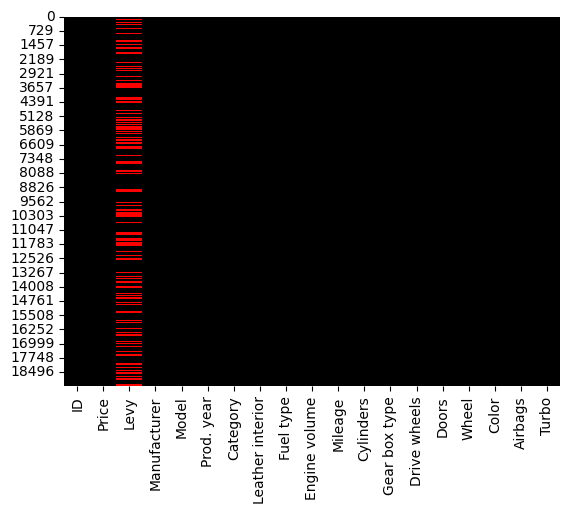

In [ ]:
color = ['black','red']
sns.heatmap(df_test.isnull(),cmap=sns.color_palette(color),cbar=False)

In [ ]:
df = df_test[:]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

Найдем и обработакм выбросы

In [ ]:
df_num = df.select_dtypes(['float','int'])
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df[col]- m)/s
df_std.head()

,ID_n,Price_n,Levy_n,Prod. year_n,Mileage_n,Cylinders_n,Airbags_n,Turbo_n
0,0.084286,-0.027374,1.063467,-0.161362,-0.028060,1.182934,1.256644,-0.333285
1,-0.900087,-0.010235,0.241100,0.015137,-0.027937,1.182934,0.331216,-0.333285
2,0.212297,-0.052673,NaN,-0.867359,-0.027773,-0.483423,-1.056927,-0.333285
3,0.206714,-0.077968,-0.095617,0.015137,-0.028409,-0.483423,-1.519641,-0.333285
4,0.249462,-0.035711,-0.993530,0.544635,-0.029988,-0.483423,-0.594213,-0.333285


<ipython-input-20-0d468aa8d553>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_std.columns)


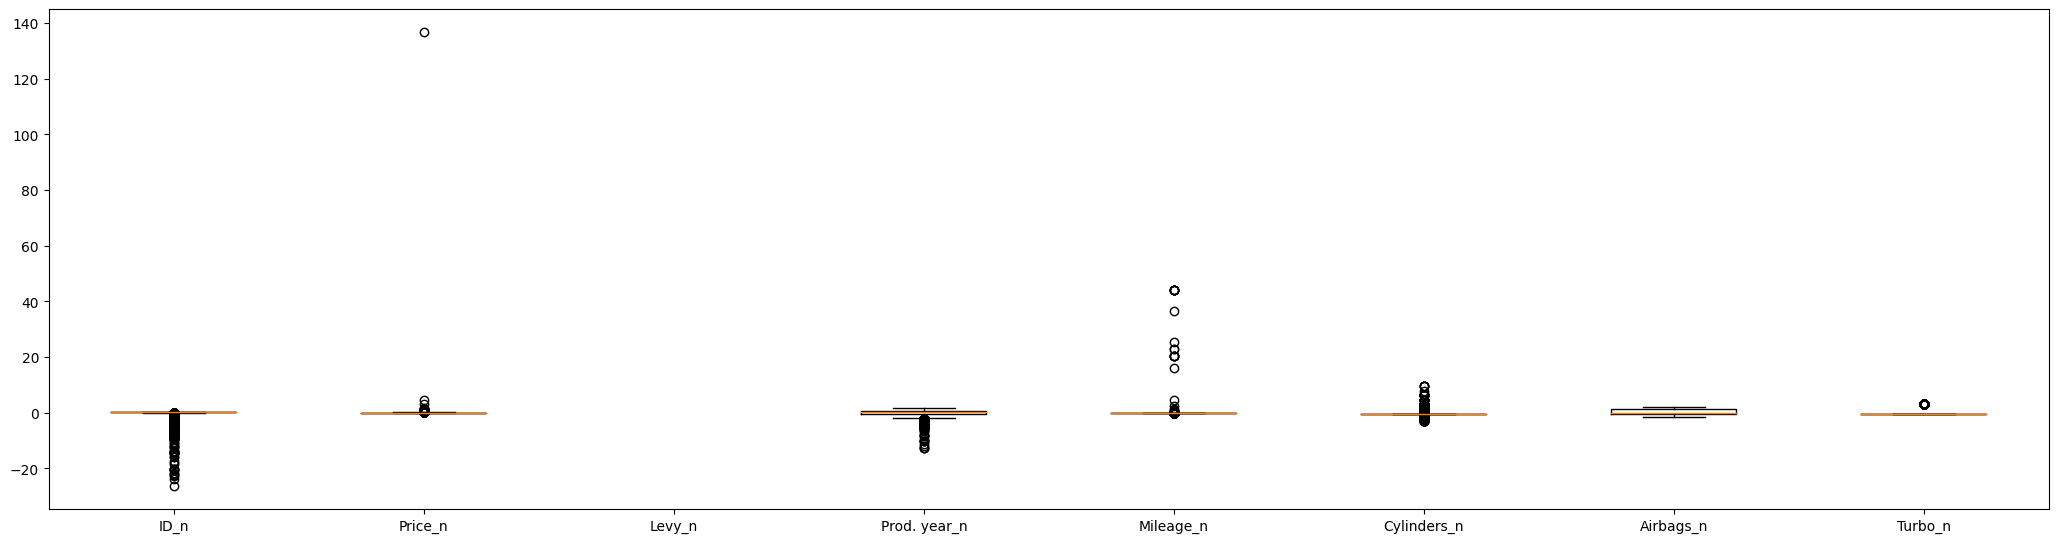

In [ ]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(df_std.columns)
data = []
for col in df_std.columns:
  data.append(df_std[col])
bp= ax.boxplot(data,widths=0.5)
plt.show()

Проверим выброс по цене

In [ ]:
df_filter = df.loc[(df.Price == df.Price.max())]
df_filter

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,45812886,26307500,NaN,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

Приведм значение выброса к NaN

In [ ]:
df.loc[(df.Price == df.Price.max()),'Price'] = np.NaN
df.describe()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Turbo
count,1.892400e+04,18923.000000,13215.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,17198.178143,906.299205,2010.914236,1.555373e+06,4.580216,6.568379,0.099979
std,9.375468e+05,19802.328371,463.296871,5.665749,4.880221e+07,1.200223,4.322323,0.299980
min,2.074688e+07,1.000000,87.000000,1939.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,4.569501e+07,5331.000000,640.000000,2009.000000,7.019575e+04,4.000000,4.000000,0.000000
50%,4.577191e+07,13172.000000,781.000000,2012.000000,1.264000e+05,4.000000,6.000000,0.000000
75%,4.580174e+07,22063.000000,1058.000000,2015.000000,1.891198e+05,4.000000,12.000000,0.000000
max,4.581665e+07,872946.000000,11714.000000,2020.000000,2.147484e+09,16.000000,16.000000,1.000000


In [ ]:
df.loc[(df['Prod. year'] < 1950)]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
6607,32171534,119172.0,NaN,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000,4.0,Automatic,Rear,04-May,Left wheel,White,0,0
10265,26556126,157.0,NaN,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5.0,129000,8.0,Automatic,Rear,04-May,Left wheel,Silver,0,0
11219,20746880,157.0,NaN,MERCEDES-BENZ,S 500,1939,Limousine,Yes,Petrol,2.4,126000,4.0,Automatic,Rear,04-May,Left wheel,White,0,0
12849,38169002,150.0,NaN,BMW,340,1947,Limousine,No,Petrol,2.0,165000,6.0,Manual,Rear,04-May,Left wheel,White,0,0
15613,41720592,200.0,NaN,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000,4.0,Manual,Rear,04-May,Left wheel,White,0,0


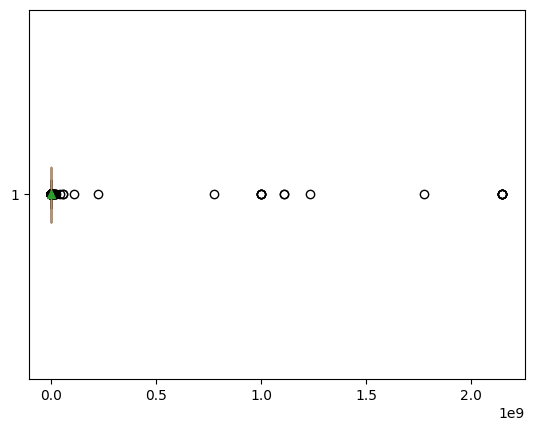

In [ ]:
plt.boxplot(df.Mileage,vert = False, showmeans = True)
plt.show()

In [ ]:
df.describe()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Turbo
count,1.892400e+04,18923.000000,13215.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,17198.178143,906.299205,2010.914236,1.555373e+06,4.580216,6.568379,0.099979
std,9.375468e+05,19802.328371,463.296871,5.665749,4.880221e+07,1.200223,4.322323,0.299980
min,2.074688e+07,1.000000,87.000000,1939.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,4.569501e+07,5331.000000,640.000000,2009.000000,7.019575e+04,4.000000,4.000000,0.000000
50%,4.577191e+07,13172.000000,781.000000,2012.000000,1.264000e+05,4.000000,6.000000,0.000000
75%,4.580174e+07,22063.000000,1058.000000,2015.000000,1.891198e+05,4.000000,12.000000,0.000000
max,4.581665e+07,872946.000000,11714.000000,2020.000000,2.147484e+09,16.000000,16.000000,1.000000


Проведим выбросы по пробегу, отфильтруем все данные гже пробег более или равен 999999

In [ ]:
df_filt = df.loc[(df.Mileage) >= 999999]
df_filt

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
144,45759786,4300.0,NaN,MERCEDES-BENZ,208,1985,Universal,No,Diesel,2.5,1111111,4.0,Manual,Rear,04-May,Left wheel,Black,1,0
493,45781924,15994.0,777.0,TOYOTA,Camry,2014,Sedan,No,Petrol,2.5,1440000,4.0,Automatic,Front,04-May,Left wheel,Silver,0,0
985,45807165,2700.0,NaN,OPEL,Vectra,1997,Sedan,No,CNG,1.6,777777777,4.0,Automatic,Front,04-May,Left wheel,Beige,2,0
1146,44615609,13485.0,NaN,BMW,525,2003,Sedan,Yes,Petrol,2.5,7777787,6.0,Manual,Rear,04-May,Left wheel,Silver,10,0
1404,45814878,9095.0,NaN,BMW,328,2002,Sedan,No,Petrol,2.8,55556665,6.0,Manual,Rear,04-May,Left wheel,Silver,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18673,45741881,40.0,NaN,HONDA,FIT,2007,Hatchback,Yes,Petrol,1.6,15000000,7.0,Automatic,Front,04-May,Left wheel,Sky blue,9,0
18846,45798379,14113.0,NaN,TOYOTA,Prius,2005,Hatchback,Yes,Hybrid,1.5,2696320,4.0,Automatic,Front,04-May,Left wheel,Grey,6,0
18950,45786695,3607.0,NaN,VOLKSWAGEN,Jetta,1999,Sedan,No,CNG,2.0,3000000,4.0,Manual,Front,04-May,Left wheel,Black,2,0
19167,45799423,18817.0,1995.0,FORD,Transit,2003,Microbus,No,Diesel,2.4,2147483647,4.0,Manual,Front,02-Mar,Left wheel,White,2,1


В столбце "Mileage" где пробег более 999999 приведем к NaN

In [ ]:
df.loc[(df.Mileage >= 999999),'Mileage'] = np.NaN
df.isna().sum()

ID                     0
Price                  1
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage               77
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Turbo                  0
dtype: int64

В столбце "Price" где цена мене или равно 600,или более или равна 600000 приравниваем к NaN

In [ ]:
df.loc[(df.Price <= 600) | (df.Price >= 600000),'Price'] = np.NaN
df.isna().sum()

ID                     0
Price               1814
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Turbo                  0
dtype: int64

Выберем данные с числовым типом для последующего заполнения методом K ближайших соседей

In [ ]:
df_num = df.select_dtypes(['float','int'])
df_num

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Turbo
0,45654403.0,13328.0,1399.0,2010.0,186005.0,6.0,12.0,0.0
1,44731507.0,16621.0,1018.0,2011.0,192000.0,6.0,8.0,0.0
2,45774419.0,8467.0,1088.6,2006.0,200000.0,4.0,2.0,0.0
3,45769185.0,3607.0,862.0,2011.0,168966.0,4.0,0.0,0.0
4,45809263.0,11726.0,446.0,2014.0,91901.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...
19232,45798355.0,8467.0,1083.2,1999.0,300000.0,4.0,5.0,1.0
19233,45778856.0,15681.0,831.0,2011.0,161600.0,4.0,8.0,0.0
19234,45804997.0,26108.0,836.0,2010.0,116365.0,4.0,4.0,0.0
19235,45793526.0,5331.0,1288.0,2007.0,51258.0,4.0,4.0,0.0


In [ ]:
imputer = KNNImputer(n_neighbors=5,weights='uniform')
imputer.fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num),index = df_num.index,columns = df_num.columns)
df_num.head()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Turbo
0,45654403.0,13328.0,1399.0,2010.0,186005.0,6.0,12.0,0.0
1,44731507.0,16621.0,1018.0,2011.0,192000.0,6.0,8.0,0.0
2,45774419.0,8467.0,1088.6,2006.0,200000.0,4.0,2.0,0.0
3,45769185.0,3607.0,862.0,2011.0,168966.0,4.0,0.0,0.0
4,45809263.0,11726.0,446.0,2014.0,91901.0,4.0,4.0,0.0


In [ ]:
df[['ID','Price','Levy','Prod. year', 'Mileage','Cylinders','Airbags','Turbo']] = df_num[['ID','Price','Levy','Prod. year', 'Mileage','Cylinders','Airbags','Turbo']]

In [ ]:
df.describe()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Turbo
count,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,18486.777891,932.322627,2010.914236,139972.944473,4.580216,6.568379,0.099979
std,9.375468e+05,17763.290635,428.876284,5.665749,102131.614305,1.200223,4.322323,0.299980
min,2.074688e+07,627.000000,87.000000,1939.000000,0.000000,1.000000,0.000000,0.000000
25%,4.569501e+07,7840.000000,687.000000,2009.000000,70128.750000,4.000000,4.000000,0.000000
50%,4.577191e+07,14113.000000,836.000000,2012.000000,126000.000000,4.000000,6.000000,0.000000
75%,4.580174e+07,23207.000000,1079.000000,2015.000000,188078.000000,4.000000,12.000000,0.000000
max,4.581665e+07,308906.000000,11714.000000,2020.000000,990000.000000,16.000000,16.000000,1.000000


In [ ]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Turbo               0
dtype: int64

In [ ]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403.0,13328.0,1399.0,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12.0,0.0
1,44731507.0,16621.0,1018.0,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8.0,0.0
2,45774419.0,8467.0,1088.6,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2.0,0.0
3,45769185.0,3607.0,862.0,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0.0,0.0
4,45809263.0,11726.0,446.0,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355.0,8467.0,1083.2,MERCEDES-BENZ,CLK 200,1999.0,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5.0,1.0
19233,45778856.0,15681.0,831.0,HYUNDAI,Sonata,2011.0,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8.0,0.0
19234,45804997.0,26108.0,836.0,HYUNDAI,Tucson,2010.0,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4.0,0.0
19235,45793526.0,5331.0,1288.0,CHEVROLET,Captiva,2007.0,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4.0,0.0


Проверим выбросы по цене

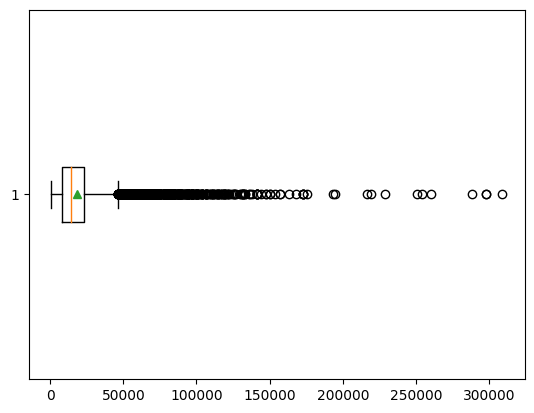

In [ ]:
plt.boxplot(df.Price,vert = False, showmeans = True)
plt.show()


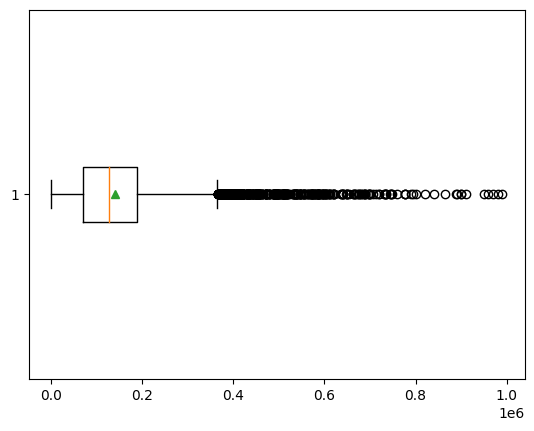

In [ ]:
plt.boxplot(df.Mileage,vert = False, showmeans = True)
plt.show()

In [ ]:
df.loc[(df.Mileage == df.Mileage.max())]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
1170,45683077.0,15053.0,584.0,HYUNDAI,Elantra,2014.0,Sedan,No,Petrol,1.8,990000.0,4.0,Tiptronic,Front,04-May,Left wheel,Silver,6.0,0.0


Метрики для исследования
1. Какую долю рынка занимают автомобили по году выпуска
2. Средняя цена по году выпуска
3. Средний пробег по году выпуска
4. Предпочтения по трансмиссии
5. Предпочтения по типу топлива

In [ ]:
df_group = df.groupby('Prod. year').count()
df_group

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
Prod. year,,,,,,,,,,,,,,,,,,
1939.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1943.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1947.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1953.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1957.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1964.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1965.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1968.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1973.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


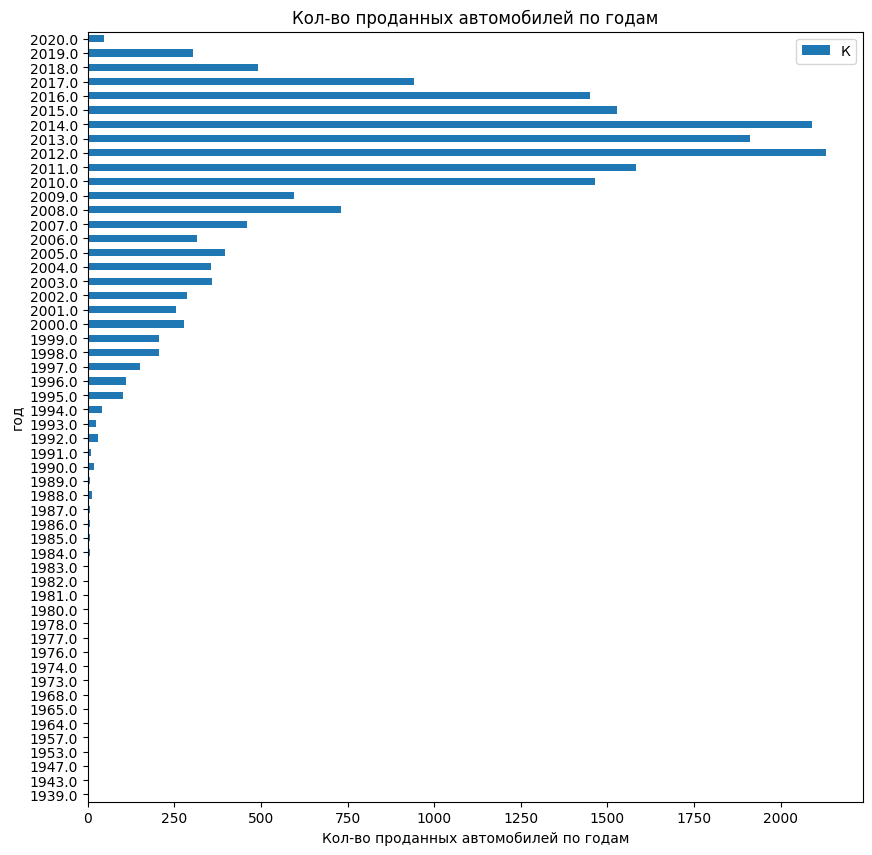

In [ ]:
df.pivot_table(index = 'Prod. year', values = 'ID', aggfunc = 'count').plot(kind='barh', figsize=(10, 10))
plt.xlabel('Кол-во проданных автомобилей по годам')
plt.ylabel('год')
plt.legend('Кол-во')
plt.title('Кол-во проданных автомобилей по годам')
plt.show()

Больше всего автомобилей было продано год выпуска которых с 2010 по 2017

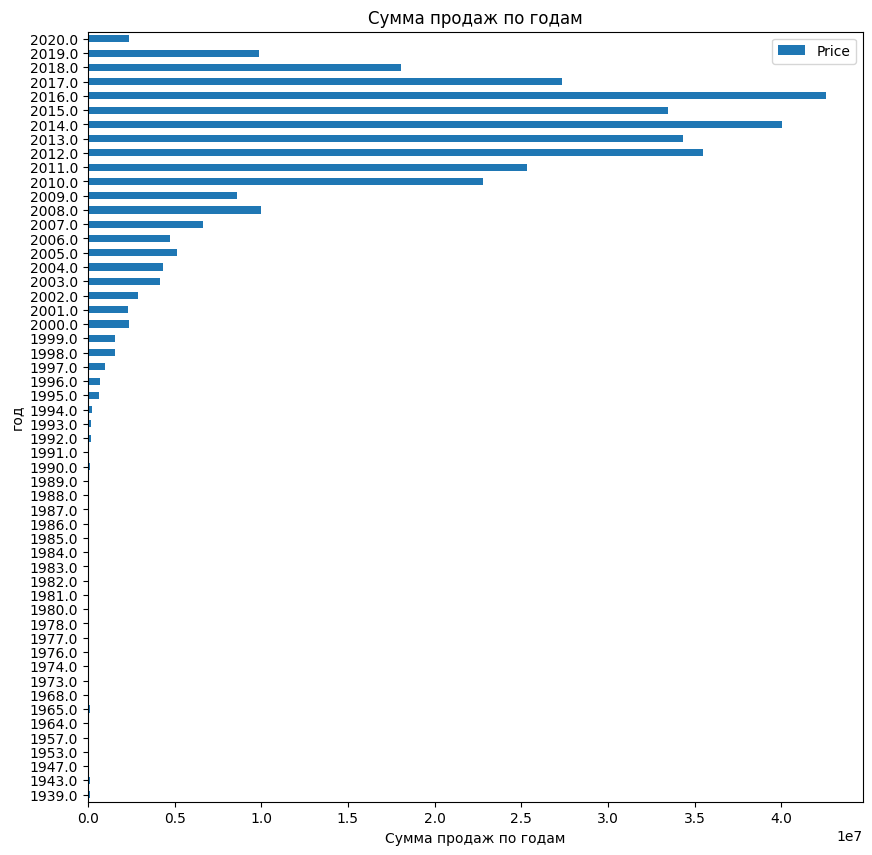

In [ ]:
df.pivot_table(index = 'Prod. year', values = 'Price', aggfunc = 'sum').plot(kind='barh', figsize=(10, 10))
plt.xlabel('Cумма продаж по годам')
plt.ylabel('год')
plt.title('Сумма продаж по годам')
plt.show()

Наибольшую прибыль принесли автомобили 2016 и 2014 годов выпуска

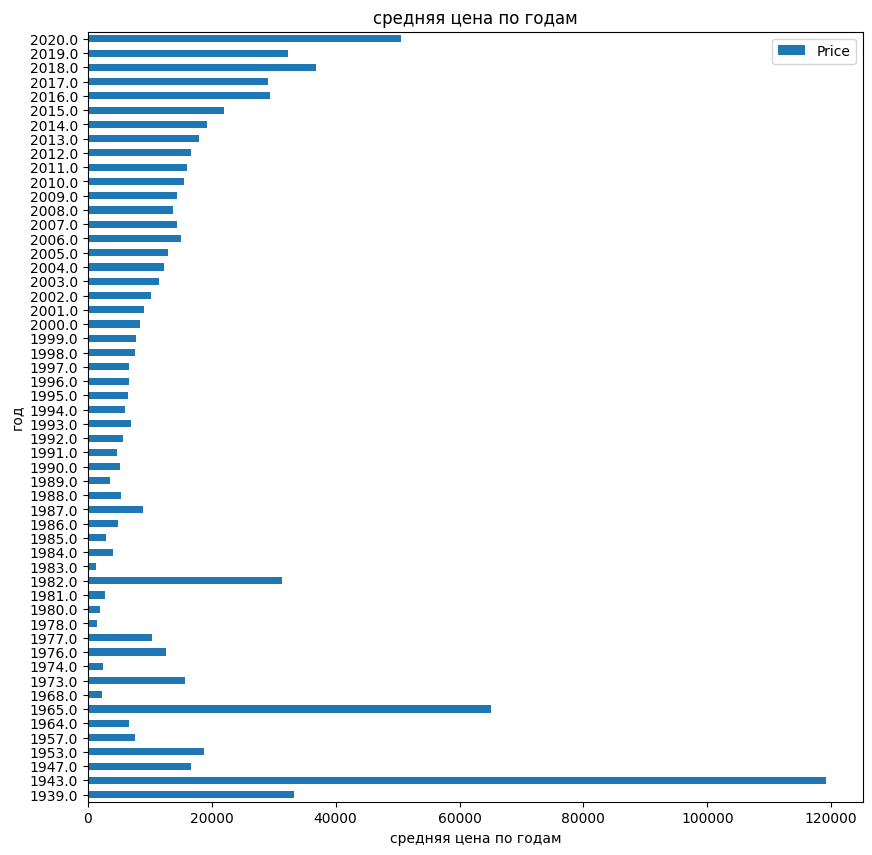

In [ ]:
df.pivot_table(index = 'Prod. year', values = 'Price', aggfunc = 'mean').plot(kind='barh', figsize=(10, 10))
plt.xlabel('средняя цена по годам')
plt.ylabel('год')
plt.title('средняя цена по годам')
plt.show()

Дальнейшую статистку будем рассматирвать по наиболее прибыльным годам (2012 - 2017)

In [ ]:
df_statistic = df.loc[(df['Prod. year'] >= 2012) & (df['Prod. year'] <= 2017)]
df_statistic

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
4,45809263.0,11726.0,446.0,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4.0,0.0
5,45802912.0,39493.0,891.0,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,04-May,Left wheel,White,4.0,0.0
7,45816158.0,6088.2,751.0,HYUNDAI,Sonata,2013.0,Sedan,Yes,Petrol,2.4,216118.0,4.0,Automatic,Front,04-May,Left wheel,Grey,12.0,0.0
8,45641395.0,1098.0,394.0,TOYOTA,Camry,2014.0,Sedan,Yes,Hybrid,2.5,398069.0,4.0,Automatic,Front,04-May,Left wheel,Black,12.0,0.0
10,45621750.0,941.0,1053.0,MERCEDES-BENZ,E 350,2014.0,Sedan,Yes,Diesel,3.5,184467.0,6.0,Automatic,Rear,04-May,Left wheel,White,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,45732720.0,10036.0,639.0,HYUNDAI,Sonata,2014.0,Sedan,Yes,LPG,2.0,735970.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4.0,0.0
19224,45768089.0,19130.0,1092.2,KIA,Optima ex,2014.0,Sedan,Yes,Petrol,2.4,35800.0,4.0,Automatic,Front,04-May,Left wheel,Black,12.0,0.0
19227,45769427.0,29793.0,1053.0,MERCEDES-BENZ,E 350,2014.0,Sedan,Yes,Diesel,3.5,219030.0,6.0,Automatic,4x4,04-May,Left wheel,Black,12.0,0.0
19231,45772306.0,5802.0,1055.0,MERCEDES-BENZ,E 350,2013.0,Sedan,Yes,Diesel,3.5,107800.0,6.0,Automatic,Rear,04-May,Left wheel,Grey,12.0,0.0


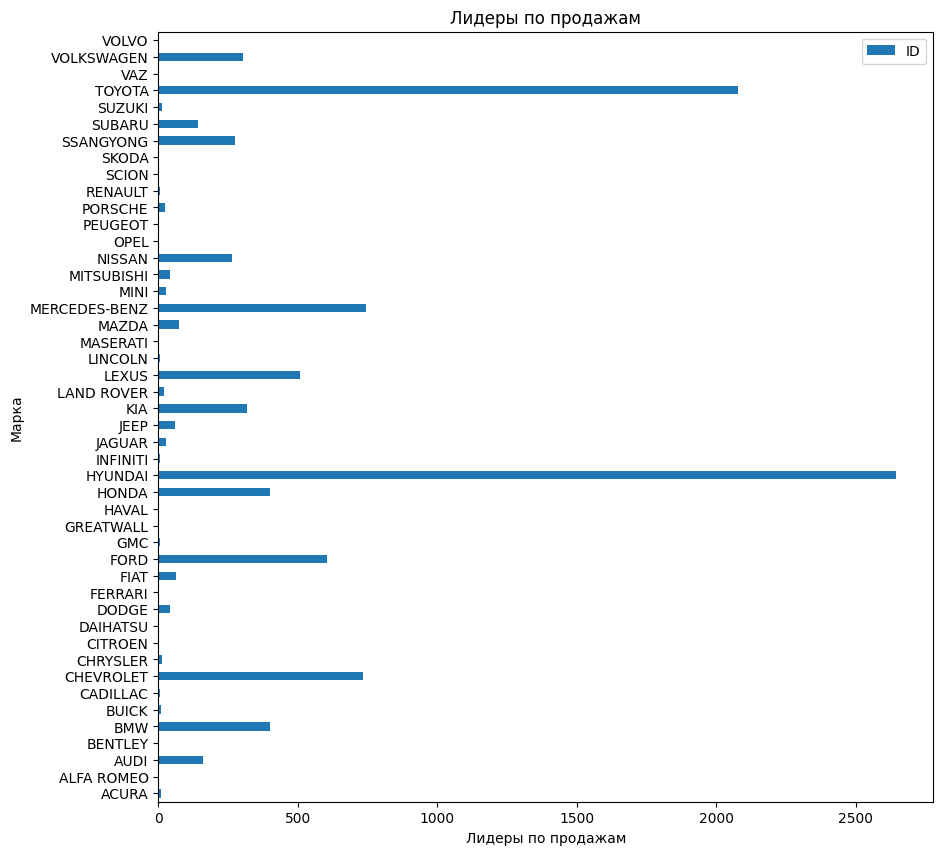

In [ ]:
df_statistic.pivot_table(index = 'Manufacturer', values = 'ID', aggfunc = 'count').plot(kind='barh', figsize=(10, 10))
plt.xlabel('Лидеры по продажам')
plt.ylabel('Марка')
plt.title('Лидеры по продажам')
plt.show()

Лидерам по продажам являются автомобили марки HYUNDAY и TOYOTA

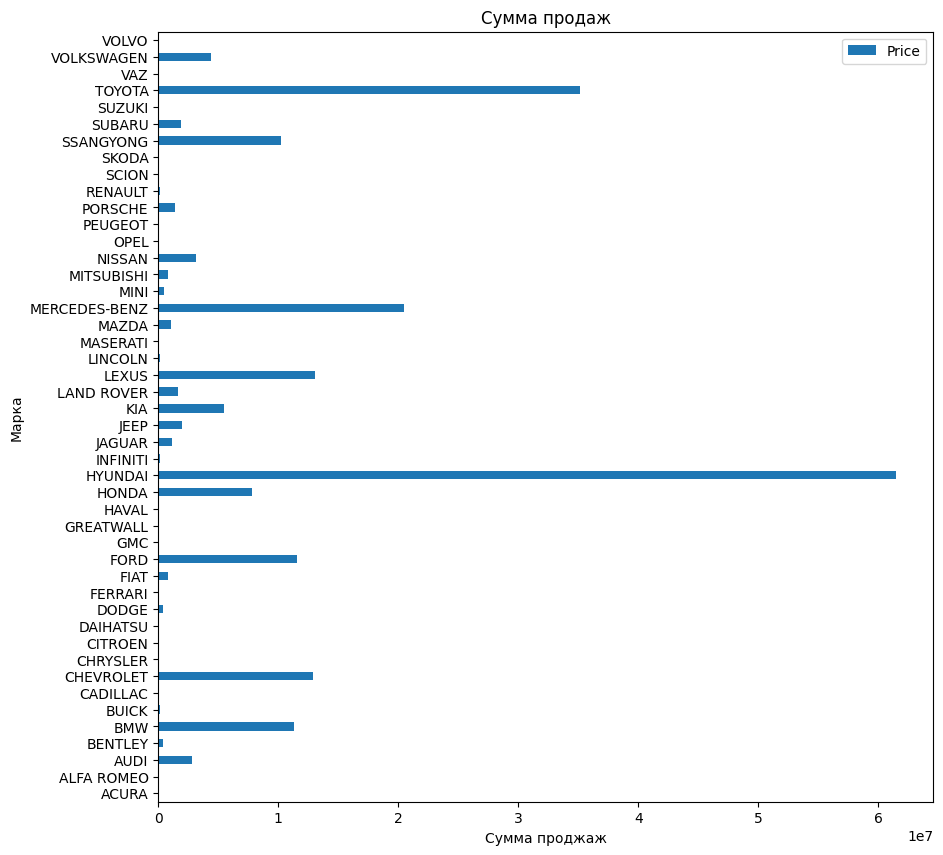

In [ ]:
df_statistic.pivot_table(index = 'Manufacturer', values = 'Price', aggfunc = 'sum').plot(kind='barh', figsize=(10, 10))
plt.xlabel('Сумма проджаж')
plt.ylabel('Марка')
plt.title('Сумма продаж')
plt.show()

Дальнейшую аналитику, статистические тесты и предиктовую модель будем проводить по топам продаж

In [ ]:
df_hyunday_toyota = df_statistic[df_statistic.Manufacturer.isin(['TOYOTA','HYUNDAI'])]
df_hyunday_toyota

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
5,45802912.0,39493.0,891.0,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,04-May,Left wheel,White,4.0,0.0
7,45816158.0,6088.2,751.0,HYUNDAI,Sonata,2013.0,Sedan,Yes,Petrol,2.4,216118.0,4.0,Automatic,Front,04-May,Left wheel,Grey,12.0,0.0
8,45641395.0,1098.0,394.0,TOYOTA,Camry,2014.0,Sedan,Yes,Hybrid,2.5,398069.0,4.0,Automatic,Front,04-May,Left wheel,Black,12.0,0.0
14,45732604.0,59464.0,891.0,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2.0,76000.0,4.0,Automatic,Front,04-May,Left wheel,White,4.0,0.0
16,45772281.0,7683.0,810.0,HYUNDAI,Elantra,2016.0,Sedan,Yes,Petrol,1.8,121840.0,4.0,Automatic,Front,04-May,Left wheel,Blue,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841.0,16386.2,831.0,HYUNDAI,Elantra,2017.0,Sedan,Yes,Petrol,1.6,25635.0,4.0,Automatic,Front,04-May,Left wheel,Black,12.0,0.0
19216,45784464.0,37633.0,1249.0,TOYOTA,RAV 4,2017.0,Jeep,Yes,Petrol,2.5,23430.0,4.0,Tiptronic,Front,04-May,Left wheel,Beige,12.0,0.0
19219,45789241.0,19444.0,595.6,TOYOTA,Prius,2013.0,Sedan,No,Hybrid,1.8,140607.0,4.0,Automatic,Front,04-May,Left wheel,Grey,12.0,0.0
19222,45732720.0,10036.0,639.0,HYUNDAI,Sonata,2014.0,Sedan,Yes,LPG,2.0,735970.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4.0,0.0


In [ ]:
len(df_hyunday_toyota)*100/len(df_statistic)

46.990349218983184

Доля автомобилей марки HYUNDAY и TOYOTA составляет 46.9 % от всего рынка продаж

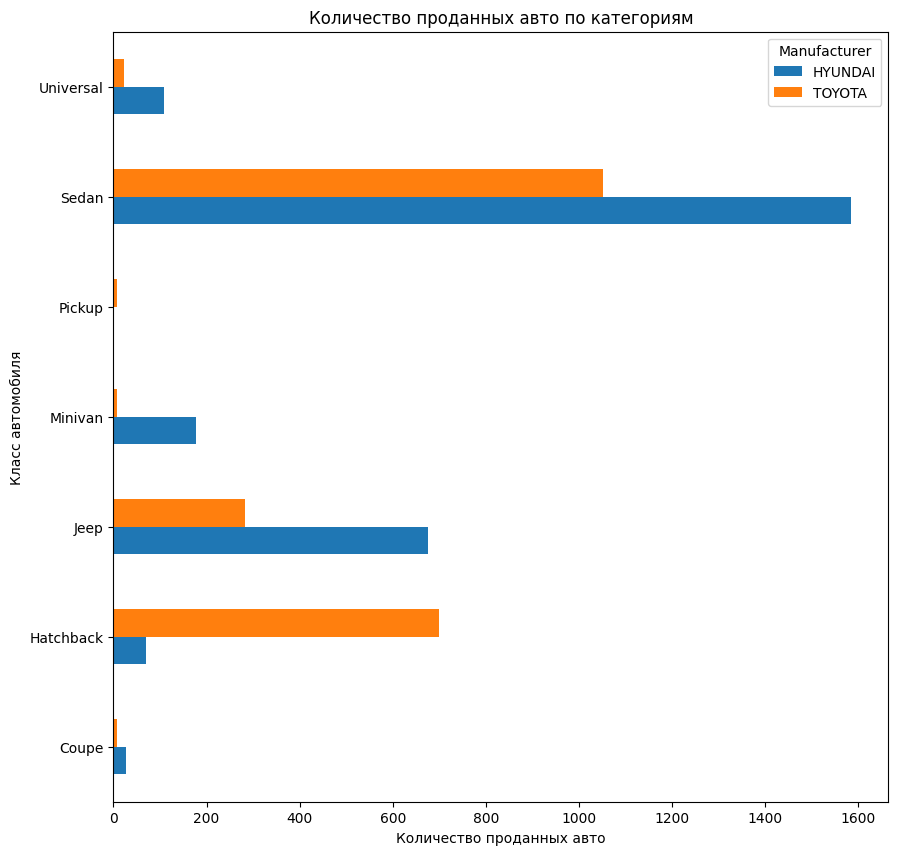

In [ ]:
df_hyunday_toyota.pivot_table(index = 'Category',columns= 'Manufacturer', values = 'Price', aggfunc = 'count').plot(kind='barh', figsize=(10, 10))
plt.xlabel('Количество проданных авто')
plt.ylabel('Класс автомобиля')
plt.title('Количество проданных авто по категориям')
plt.show()

Наиболее популярными автомобилями по классам я вляются Седаны и Джипы

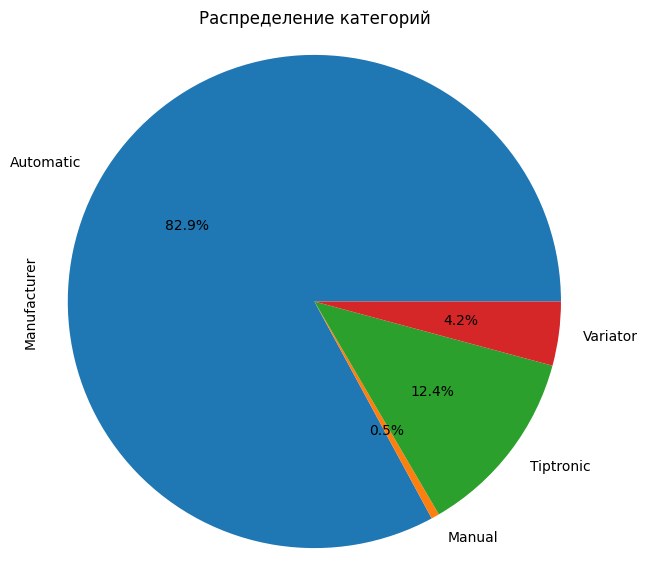

In [ ]:
df_group_transmission = df_hyunday_toyota.groupby('Gear box type').count()
df_group_transmission['Manufacturer'].plot(kind='pie', figsize=(7,7),
                  autopct='%1.1f%%')
plt.title('Распределение категорий')
plt.axis('equal')
plt.show()

В связи с ростом технологий производители в основном производят автомобили с автоматической коробкой передач

In [ ]:
df_hyunday_toyota

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
5,45802912.0,39493.0,891.0,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,04-May,Left wheel,White,4.0,0.0
7,45816158.0,6088.2,751.0,HYUNDAI,Sonata,2013.0,Sedan,Yes,Petrol,2.4,216118.0,4.0,Automatic,Front,04-May,Left wheel,Grey,12.0,0.0
8,45641395.0,1098.0,394.0,TOYOTA,Camry,2014.0,Sedan,Yes,Hybrid,2.5,398069.0,4.0,Automatic,Front,04-May,Left wheel,Black,12.0,0.0
14,45732604.0,59464.0,891.0,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2.0,76000.0,4.0,Automatic,Front,04-May,Left wheel,White,4.0,0.0
16,45772281.0,7683.0,810.0,HYUNDAI,Elantra,2016.0,Sedan,Yes,Petrol,1.8,121840.0,4.0,Automatic,Front,04-May,Left wheel,Blue,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841.0,16386.2,831.0,HYUNDAI,Elantra,2017.0,Sedan,Yes,Petrol,1.6,25635.0,4.0,Automatic,Front,04-May,Left wheel,Black,12.0,0.0
19216,45784464.0,37633.0,1249.0,TOYOTA,RAV 4,2017.0,Jeep,Yes,Petrol,2.5,23430.0,4.0,Tiptronic,Front,04-May,Left wheel,Beige,12.0,0.0
19219,45789241.0,19444.0,595.6,TOYOTA,Prius,2013.0,Sedan,No,Hybrid,1.8,140607.0,4.0,Automatic,Front,04-May,Left wheel,Grey,12.0,0.0
19222,45732720.0,10036.0,639.0,HYUNDAI,Sonata,2014.0,Sedan,Yes,LPG,2.0,735970.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4.0,0.0


Построим матрицу корреляции

In [ ]:
#В виду разных шкал, стандартизируем данные
df_num = df.select_dtypes(['float','int'])
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df[col]- m)/s

Найдем уникальные значения для следующего перебора в цикле и присвоим количественные значения

In [ ]:
df_corr_heatmap = df_hyunday_toyota[:]
step_Manufacturer =  df_corr_heatmap['Manufacturer'].unique()
step_Model = df_corr_heatmap['Model'].unique()
step_color = df_corr_heatmap['Color'].unique()

In [ ]:
#Заменим качественные данные на количественные
#Если значение из столбца "Manufacturer" есть в step_Manufacturer, то заменяем на значение i
for i in range (len(step_Manufacturer)):
  df_corr_heatmap.loc[(df_corr_heatmap['Manufacturer'] == step_Manufacturer[i]),'Manufacturer'] = i
#Если значение из столбца "Model" есть в step_Model, то заменяем на значение i
for i in range(len(step_Model)):
  df_corr_heatmap.loc[(df_corr_heatmap['Model'] == step_Model[i]),'Model'] = int(i)
#Если значение из столбца "Color" есть в step_color, то заменяем на значение i
for i in range(len(step_color)):
  df_corr_heatmap.loc[(df_corr_heatmap['Color'] == step_color[i]), 'Color'] = int(i)
#Так же заменяем на количественные значения, но так как уникальных значений не так много, то заменим более явно
def Category(x):
  if x == 'Jeep':
    return 0
  elif x == 'Sedan':
    return 1
  elif x == 'Universal':
    return 2
  elif x == 'Hatchback':
    return 3
  elif x == 'Minivan':
    return 4
  elif x == 'Coupe':
    return 5
  elif x == 'Pickup':
    return 6
def Leather_interior(x):
    if x =='Yes':
      return 0
    else:
      return 1
def Fuel_type(x):
  if x == 'Diesel':
    return 0
  elif x == 'Petrol':
    return 1
  elif x == 'Hybrid':
    return 2
  elif x == 'Plug-in Hybrid':
    return 3
  elif x == 'LPG':
    return 4
  else:
    return 5

def Gear_box_type(x):
  if x == 'Automatic':
    return 0
  elif x == 'Tiptronic':
    return 1
  elif x == 'Variator':
    return 2
  else:
    return 3
def Drive_wheels(x):
  if x == 'Front':
    return 0
  elif x == '4x4':
    return 1
  else:
    return 2
def Doors(x):
  if x == '04-May':
    return 0
  elif x == '02-Mar':
    return 1
  else:
    return 2
def Wheel(x):
  if x == 'Left wheel':
    return 0
  else:
    return 1
#Создадим функцию для замены значений
def process_data(df):
  df_corr_heatmap['Category'] = df_corr_heatmap['Category'].apply(Category)
  df_corr_heatmap['Leather interior'] = df_corr_heatmap['Leather interior'].apply(Leather_interior)
  df_corr_heatmap['Fuel type'] = df_corr_heatmap['Fuel type'].apply(Fuel_type)
  df_corr_heatmap['Gear box type'] = df_corr_heatmap['Gear box type'].apply(Gear_box_type)
  df_corr_heatmap['Drive wheels'] = df_corr_heatmap['Drive wheels'].apply(Drive_wheels)
  df_corr_heatmap['Doors'] = df_corr_heatmap['Doors'].apply(Doors)
  df_corr_heatmap['Wheel'] = df_corr_heatmap['Wheel'].apply(Wheel)
  return df
#Применим функцию к датафрейму
df_corr_heatmap = process_data(df_corr_heatmap)
df_corr_heatmap

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
5,45802912.0,39493.0,891.0,0,0,2016.0,0,0,0,2.0,160931.0,4.0,0,0,0,0,0,4.0,0.0
7,45816158.0,6088.2,751.0,0,1,2013.0,1,0,1,2.4,216118.0,4.0,0,0,0,0,1,12.0,0.0
8,45641395.0,1098.0,394.0,1,2,2014.0,1,0,2,2.5,398069.0,4.0,0,0,0,0,2,12.0,0.0
14,45732604.0,59464.0,891.0,0,0,2016.0,0,0,0,2.0,76000.0,4.0,0,0,0,0,0,4.0,0.0
16,45772281.0,7683.0,810.0,0,3,2016.0,1,0,1,1.8,121840.0,4.0,0,0,0,0,3,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841.0,16386.2,831.0,0,3,2017.0,1,0,1,1.6,25635.0,4.0,0,0,0,0,2,12.0,0.0
19216,45784464.0,37633.0,1249.0,1,24,2017.0,0,0,1,2.5,23430.0,4.0,1,0,0,0,8,12.0,0.0
19219,45789241.0,19444.0,595.6,1,4,2013.0,1,1,2,1.8,140607.0,4.0,0,0,0,0,1,12.0,0.0
19222,45732720.0,10036.0,639.0,0,1,2014.0,1,0,4,2.0,735970.0,4.0,0,0,0,0,4,4.0,0.0


<Axes: >

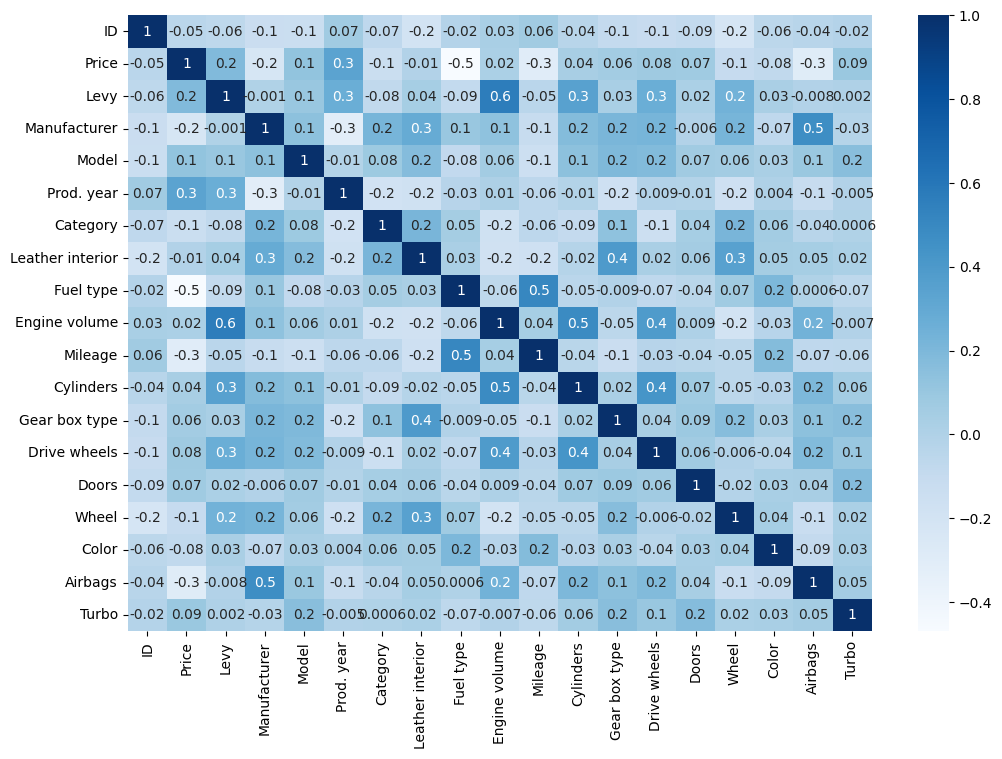

In [ ]:
corr_mat = df_corr_heatmap.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, cmap = 'Blues',annot = True,fmt='.1g')


Из матрицы корреляции видим следующие закономерности

•	Чем больше пробег, тем меньше цена.

•	Чем старше автомобиль, тем меньше цена.

•	Чем безопасней автомобиль, тем выше его цена.



**Проведем t-тест на проверку гипотезы, что выбор типа двигателя автомобиля не зависит от пробега**

In [ ]:
df_Mileage_1 = df_hyunday_toyota[df_hyunday_toyota['Fuel type'] == 'Diesel'].sample(n=500)
df_Mileage_2 = df_hyunday_toyota[df_hyunday_toyota['Fuel type'] == 'Petrol'].sample(n=500)



In [ ]:
df_Mileage_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 5941 to 5248
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                500 non-null    float64
 1   Price             500 non-null    float64
 2   Levy              500 non-null    float64
 3   Manufacturer      500 non-null    object 
 4   Model             500 non-null    object 
 5   Prod. year        500 non-null    float64
 6   Category          500 non-null    object 
 7   Leather interior  500 non-null    object 
 8   Fuel type         500 non-null    object 
 9   Engine volume     500 non-null    object 
 10  Mileage           500 non-null    float64
 11  Cylinders         500 non-null    float64
 12  Gear box type     500 non-null    object 
 13  Drive wheels      500 non-null    object 
 14  Doors             500 non-null    object 
 15  Wheel             500 non-null    object 
 16  Color             500 non-null    object 
 17

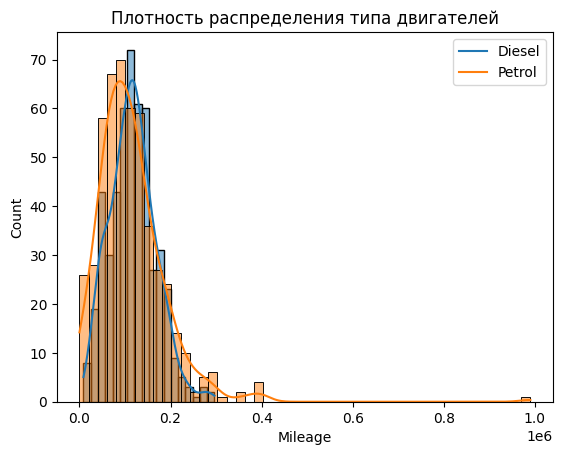

In [ ]:
sns.histplot(df_Mileage_1['Mileage'], kde=True)
sns.histplot(df_Mileage_2['Mileage'], kde = True)
plt.title('Плотность распределения типа двигателей')
plt.legend(['Diesel', 'Petrol'])
plt.show()

In [ ]:
alpha = 0.05

In [ ]:
result = ttest_ind(df_Mileage_1['Mileage'], df_Mileage_2['Mileage'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')



p-value: 0.48485255
Не отвергаем нулевую гипотезу


**Вывод**: Выбор покупателей в пользу того или иного типа двигателя статистически не значим от пробега автомобиля

In [ ]:
df_corr_heatmap

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
5,45802912.0,39493.0,891.0,0,0,2016.0,0,0,0,2.0,160931.0,4.0,0,0,0,0,0,4.0,0.0
7,45816158.0,6088.2,751.0,0,1,2013.0,1,0,1,2.4,216118.0,4.0,0,0,0,0,1,12.0,0.0
8,45641395.0,1098.0,394.0,1,2,2014.0,1,0,2,2.5,398069.0,4.0,0,0,0,0,2,12.0,0.0
14,45732604.0,59464.0,891.0,0,0,2016.0,0,0,0,2.0,76000.0,4.0,0,0,0,0,0,4.0,0.0
16,45772281.0,7683.0,810.0,0,3,2016.0,1,0,1,1.8,121840.0,4.0,0,0,0,0,3,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841.0,16386.2,831.0,0,3,2017.0,1,0,1,1.6,25635.0,4.0,0,0,0,0,2,12.0,0.0
19216,45784464.0,37633.0,1249.0,1,24,2017.0,0,0,1,2.5,23430.0,4.0,1,0,0,0,8,12.0,0.0
19219,45789241.0,19444.0,595.6,1,4,2013.0,1,1,2,1.8,140607.0,4.0,0,0,0,0,1,12.0,0.0
19222,45732720.0,10036.0,639.0,0,1,2014.0,1,0,4,2.0,735970.0,4.0,0,0,0,0,4,4.0,0.0


##Формируем признаки и целевую переменную

In [ ]:
#Признаки для обучения
x = df_corr_heatmap[['Levy','Manufacturer','Model','Prod. year','Category','Leather interior','Fuel type','Engine volume','Mileage','Cylinders', 'Gear box type','Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Turbo']]
#Целевая переменная
y = df_corr_heatmap['Price']

## Разделяем данные на выборку для обучения/проверки

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Создаем и обучаем модель линейной регресии

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ 4.40342396e+00,  1.06522544e+03,  3.89834263e+01,  2.24565361e+03,
       -1.04810223e+03,  8.51495979e+02, -4.52524410e+03, -8.21115126e+02,
       -8.92267640e-03,  2.19459866e+02,  3.73548654e+03,  1.95751133e+03,
        2.34253488e+03, -9.75785576e+03, -1.20275024e+02, -1.22903875e+03,
        3.47667763e+03])

## Получаем предсказание и оцениваем качество

In [ ]:
lr.predict(x_test)

array([15544.80422841,  3633.97270506,  5008.72890336, 32593.04582555,
       19638.68896811, 22512.23655194, 12748.94215158, 14511.66510214,
       43129.96187083, 33815.83895564, 26087.46240816, 13773.29854721,
       10172.23261932, 24632.61986503, 31589.78279253,  7619.4526905 ,
       24459.33484529, 24894.04612501, 17829.52982972, 33089.99346871,
       21811.30125055, 38868.66533936, 31226.95767933, 32616.41166121,
       29133.2746562 , 14306.36121257, 13823.02909058, 24944.94779758,
       34948.51598464, 12496.24303335, 13539.57813947, 21531.37697079,
       26991.12352573, 31378.39566602, 23809.84250655,  6511.96523278,
       43019.55904605, 29340.45070303, 39078.21227133, 12773.60315135,
        8043.9452388 , 30798.47593037, 20387.6573955 , 11703.72963801,
       20038.01259091, 25497.03426819, 31324.52071584, 33654.589309  ,
       19552.1664845 , 19368.5272548 , 11674.52571817, 23232.58892951,
        7619.4526905 , 22934.96302339, 30164.2997297 ,  5008.72890336,
      

In [ ]:
pd.DataFrame([y_test.values, lr.predict(x_test)]).T

,0,1
0,23521.0,15544.804228
1,19800.0,3633.972705
2,4704.2,5008.728903
3,47217.0,32593.045826
4,14113.0,19638.688968
...,...,...
940,27946.0,30147.406270
941,11299.0,10920.447598
942,49165.0,27208.055125
943,14113.0,9601.382351


##Расчитаем среднеквадратичную ошибку

Среднеквадратичная ошибка на тестовых данных

In [ ]:
RMSE_test = math.sqrt(mean_squared_error(y_test, lr.predict(x_test)))
RMSE_test

10606.050807295045

Среднеквадратичная ошибка на тренировочных данных

In [ ]:
RMSE_train = math.sqrt(mean_squared_error(y_train, lr.predict(x_train)))
RMSE_train

10284.748182933832

In [ ]:
df_corr_heatmap

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
5,45802912.0,39493.0,891.0,0,0,2016.0,0,0,0,2.0,160931.0,4.0,0,0,0,0,0,4.0,0.0
7,45816158.0,6088.2,751.0,0,1,2013.0,1,0,1,2.4,216118.0,4.0,0,0,0,0,1,12.0,0.0
8,45641395.0,1098.0,394.0,1,2,2014.0,1,0,2,2.5,398069.0,4.0,0,0,0,0,2,12.0,0.0
14,45732604.0,59464.0,891.0,0,0,2016.0,0,0,0,2.0,76000.0,4.0,0,0,0,0,0,4.0,0.0
16,45772281.0,7683.0,810.0,0,3,2016.0,1,0,1,1.8,121840.0,4.0,0,0,0,0,3,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841.0,16386.2,831.0,0,3,2017.0,1,0,1,1.6,25635.0,4.0,0,0,0,0,2,12.0,0.0
19216,45784464.0,37633.0,1249.0,1,24,2017.0,0,0,1,2.5,23430.0,4.0,1,0,0,0,8,12.0,0.0
19219,45789241.0,19444.0,595.6,1,4,2013.0,1,1,2,1.8,140607.0,4.0,0,0,0,0,1,12.0,0.0
19222,45732720.0,10036.0,639.0,0,1,2014.0,1,0,4,2.0,735970.0,4.0,0,0,0,0,4,4.0,0.0


## Делаем предсказание для одного автомобиля

In [ ]:
#['ID','Levy','Manufacturer','Model','Prod. year','Category','Leather interior','Fuel type','Engine volume','Mileage','Cylinders', 'Gear box type','Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Turbo']
data = [{
    "Levy": 891.0,
    "Manufacturer": 0,
    "Model": 0,
    "Prod. year": 2016.0,
    "Category": 0,
    "Leather interior": 0,
    "Fuel type": 0,
    "Engine volume": 2.0,
    "Mileage":161000.0,
    "Cylinders":4.0,
    "Gear box type":0,
    "Drive wheels":0,
    "Doors":0,
    "Wheel":0,
    "Color":0,
    "Airbags":4.0,
    "Turbo":0

}]

In [ ]:
df_price_predict = pd.DataFrame(data)
df_price_predict

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,891.0,0,0,2016.0,0,0,0,2.0,161000.0,4.0,0,0,0,0,0,4.0,0


In [ ]:
lr.predict(df_price_predict)

array([35162.7583676])

Проверим выбросы на готовом датасете

In [ ]:
df_num_res = df_hyunday_toyota.select_dtypes(['float','int'])
df_std_res = pd.DataFrame()
for col in df_num_res.columns:
  m = df_num_res[col].mean()
  s = df_num_res[col].std()
  df_std_res[col + '_n'] = (df_hyunday_toyota[col]- m)/s
df_std.head()

,ID_n,Price_n,Levy_n,Prod. year_n,Mileage_n,Cylinders_n,Airbags_n,Turbo_n
0,0.084286,-0.290418,1.088140,-0.161362,0.450713,1.182934,1.256644,-0.333285
1,-0.900087,-0.105036,0.199772,0.015137,0.509412,1.182934,0.331216,-0.333285
2,0.212297,-0.564072,0.364388,-0.867359,0.587742,-0.483423,-1.056927,-0.333285
3,0.206714,-0.837670,-0.163969,0.015137,0.283879,-0.483423,-1.519641,-0.333285
4,0.249462,-0.380604,-1.133946,0.544635,-0.470686,-0.483423,-0.594213,-0.333285


<ipython-input-91-f9b00ca565ba>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_std_res.columns)


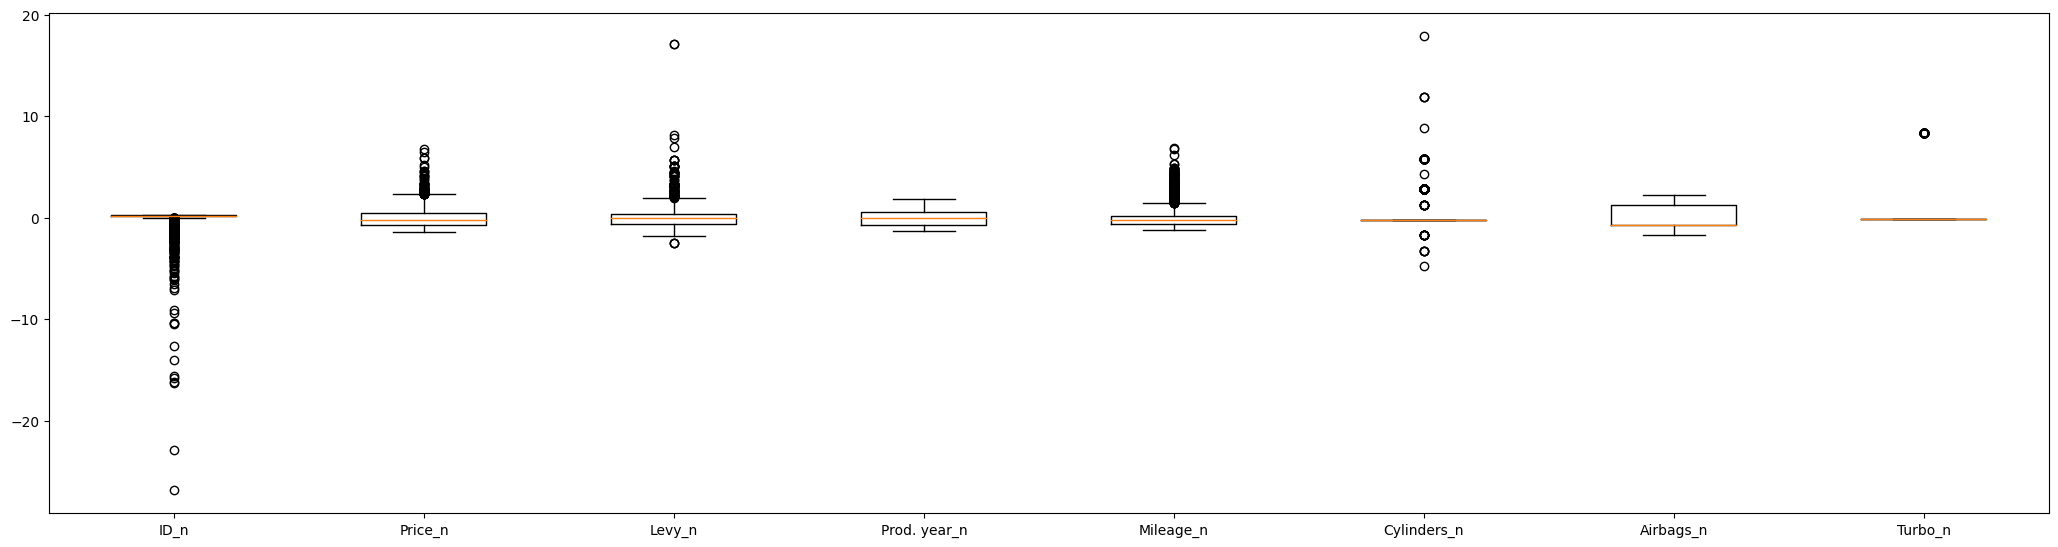

In [ ]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(df_std_res.columns)
data = []
for col in df_std_res.columns:
  data.append(df_std_res[col])
bp= ax.boxplot(data,widths=0.5)
plt.show()

**Вывод:**
1. Наиболее продаваемые автомобили в возрасте от 3 до 10 лет
2. Самые продаваемые марки автомобилей: TOYOTA и HYUNDAY
3. Наиболее продаваем автомобили класса Седан и Джип
4. Большую часть рынка занимают автомобили с автоматической коробкой передач
5. В умеренной степени цена на поддержанный автомобиль зависит от пробега, года выпуска и уровня безопасности (количества подушек безопасности)
6. Спроектированная предиктовая модель в среднем ошибается на 9887.59 едениц, качество и погрешность приемлемы, учитывая малый объем данных, который мы подаем модели. Это говорит о работоспособности модели для данного исследования. Для более точной модели, необходимо учитывать состояние автомобиля, а также его комплектацию.
7. По результатам t-testa было получено значение p-value > уровня значимости, что говорит о статистически не значимых различиях в выборе между бензиновым двигателем и дизельным двигателем.

**Рекомендации:**


1.   Стрейкхолдерам рекомендуется акцентировать внимание на автомобилях, возраст которых составляет от 3 до 10 лет.
2.   В автопарке рекомендуется иметь 46% автомобилей марок «TOYOTA» и «HYUNDAY
3.   Все автомобили должны быть с автоматической коробкой передач
4.   Делать акцент на продаже автомобилей категории “Sedan” и “Jeep”
5.   Для более точной предиктовой модели, стрейкхолдерам рекомендуется ввести дополнительные параметры автомобилей, такие как: состояние и комплектация.

